In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

In [2]:
boston=load_boston()
X=boston.data
Y=boston.target

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)

In [12]:
X_train_final=np.insert(X_train_scaled,0,1,axis=1)
X_test_final=np.insert(X_test_scaled,0,1,axis=1)

In [17]:
n,k=X_train_final.shape
beta=np.zeros(k)
alpha=0.1
iterations=1000
cost=[]
for i in range(iterations):
    cost_gradient=(X_train_final.T.dot((X_train_final.dot(beta)-Y_train)))/n
    beta=beta-alpha*cost_gradient
    cost.append((np.sum((X_train_final.dot(beta)-Y_train)**2))/2*n)

In [18]:
Y_predict=X_test_final.dot(beta)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.6687337832022318

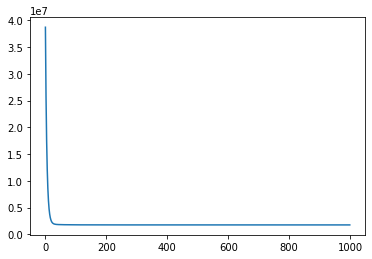

In [19]:
import matplotlib.pyplot as plt
plt.plot(cost)

In [30]:
def linear_regression(X_train_final,Y_train,iterations,alpha):
    n,k=X_train_final.shape
    beta=np.zeros(k)
    cost=[]
    for i in range(iterations):
        cost_gradient=(X_train_final.T.dot(X_train_final.dot(beta)-Y_train))/n
        beta=beta-alpha*cost_gradient
        cost.append(np.sum((X_train_final.dot(beta)-Y_train)**2)/n)
    return beta,cost[-1]

In [36]:
alphas=[0.001,0.01,0.1]
epochs=[100,200,300,400,500,600]
best_model={'r2':-np.inf,'cost':np.inf,'alpha':None,'cost':None,'iteration':None,'beta':None}
for epoch in epochs:
    for alpha in alphas:
        beta,cost=linear_regression(X_train_final,Y_train,epoch,alpha)
        Y_predict=X_test_final.dot(beta)
        r2=r2_score(Y_test,Y_predict)
        if r2>best_model['r2'] or (r2==best_model['r2'] and cost<best_model['cost']):
            best_model.update({'r2':r2,'cost':cost,'alpha':alpha,'cost':cost,'iteration':iteration,'beta':beta})
        

In [37]:
best_model

{'r2': 0.6684256845086622,
 'cost': 21.641685835421853,
 'alpha': 0.1,
 'iteration': 100,
 'beta': array([22.79653465, -0.99901414,  0.68892174,  0.26402282,  0.72092615,
        -2.02069808,  3.14864608, -0.17731447, -3.08005723,  2.20915658,
        -1.71988469, -2.03647422,  1.12931548, -3.60960258])}